In [1]:
from get_am_fm_spectrum_feats import *
from get_am_fm_spectrogram_feats import *

In [2]:
wavfile = r"D:\My_Research\Dementia\ADReSSo21\diagnosis\test-dist\audio\adrsdt1.wav"

### RFA spectrum

In [3]:
# fre_mag: RFA spectrum (mag and freq) - AM
fs = 16000
fre_mag_am, signal_am, envelope_am = mag_AM_onewav(wavfile)
signallength_am = len(signal_am)
signalseconds_am = signallength_am / fs

In [4]:
import matplotlib.pyplot as plt

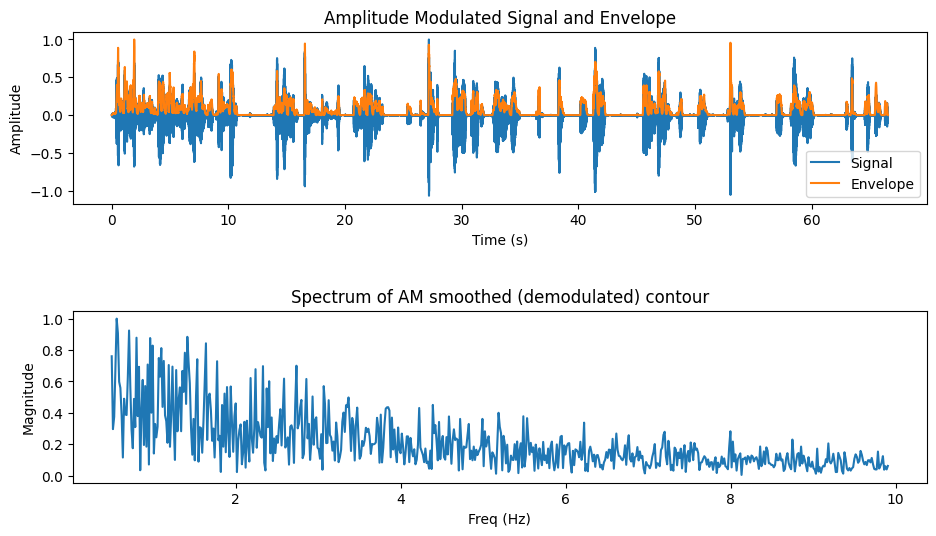

In [5]:


t = np.arange(0, len(signal_am)) / fs  # time axis in seconds

plt.figure(figsize=(10, 6))  # Optional: wider figure

# First subplot (time domain)
plt.subplot(211)
plt.plot(t, signal_am, label='Signal')
plt.plot(t, envelope_am, label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Amplitude Modulated Signal and Envelope')

# Second subplot (frequency domain)
plt.subplot(212)
plt.plot(fre_mag_am[0], fre_mag_am[1], label='Spectrum')
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of AM smoothed (demodulated) contour')

# Fix spacing between subplots
plt.tight_layout(pad=3.0)  # Increase padding between subplots

# Optional: manually tweak spacing
# plt.subplots_adjust(hspace=0.5)

plt.show()

Similarly Can be observed for FM

In [6]:
# fre_mag: RFA spectrum (mag and freq) - FM
fs = 16000
fre_mag_fm, signal_fm, envelope_fm = mag_FM_onewav(wavfile)
signallength_fm = len(signal_fm)
signalseconds_fm = signallength_fm / fs

A way of parameterization of AM FM spectrum

In [7]:
spectrum_vec = compute_am_fm_spectrum_dct_threshold_based_RFs_feature(wavfile, rhythmcount=6, threshold=0.3)

In [8]:
# features with names
spectrum_vec, names_feats = extract_feats_with_names(wavfile, rhythmcount=6, threshold=0.3)

In [9]:
spectrum_vec

array([2.61644867e+02, 9.97188187e+01, 3.40345688e+01, 1.93451023e+01,
       1.00488218e+02, 4.12426721e+01, 2.16516177e+01, 1.70950113e+01,
       7.80000000e+01, 2.52900000e+00, 1.88400000e+00, 7.00000000e+00,
       3.93000000e-01, 1.21000000e-01])

In [10]:
names_feats # from the spectrum we can get 14 feats

['dct_am_1',
 'dct_am_2',
 'dct_am_3',
 'dct_am_4',
 'dct_fm_1',
 'dct_fm_2',
 'dct_fm_3',
 'dct_fm_4',
 'am_peak_count',
 'am_freq_mean',
 'am_freq_var',
 'fm_peak_count',
 'fm_freq_mean',
 'fm_freq_var']

In [29]:
### RFA spectrogram
fm_spec, fm_frq = get_FM_spectrogram(wavfile, specwindowsecs=3, specstrides=100)
am_spec, am_frq = get_AM_spectrogram(wavfile, specwindowsecs=3, specstrides=100)


In [30]:
am_spec

array([[19729.98451827,  3975.94262737,  2385.65108875, ...,
          572.63511653,  1625.38173756,  1426.14251568],
       [17970.14285857,  3961.02387605,  1431.55549896, ...,
          220.9324254 ,  1331.20602234,  1845.82625704],
       [17057.25426889,  3985.54849649,  1752.46448487, ...,
         1201.7000326 ,  1008.34678888,  1414.4586389 ],
       ...,
       [ 4601.44546301,   252.5347931 ,  3284.42645831, ...,
          740.62887537,   115.47186468,   594.54706507],
       [ 7370.08257755,  2526.28116004,   902.16011955, ...,
          599.63327624,   241.86232574,   702.6131623 ],
       [ 5842.26174699,  2610.31619914,    65.53278419, ...,
          180.30125846,   571.78560152,   407.4170611 ]])

In [44]:
am_frq[0]

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
       3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
       5.        , 5.33333333, 5.66666667, 6.        , 6.33333333,
       6.66666667, 7.        , 7.33333333, 7.66666667, 8.        ,
       8.33333333, 8.66666667, 9.        , 9.33333333, 9.66666667])

In [38]:
def plot_mod_spectrogram(spec, freqs, title, hop_sec):
    spec = np.asarray(spec)
    freqs = np.asarray(freqs).squeeze()   # 🔑 FIX

    if freqs.ndim != 1:
        raise ValueError(f"freqs must be 1-D after squeeze, got {freqs.shape}")

    T = spec.shape[1]
    time_end = T * hop_sec

    plt.figure(figsize=(10, 4))
    plt.imshow(
        20 * np.log10(spec + 1e-6),
        origin="lower",
        aspect="auto",
        extent=[0, time_end, freqs.min(), freqs.max()],
        cmap="magma"
    )
    plt.colorbar(label="Magnitude (dB)")
    plt.xlabel("Time (s)")
    plt.ylabel("Modulation Frequency (Hz)")
    plt.title(title)
    plt.tight_layout()
    plt.show()



In [32]:
am_spec.shape

(101, 30)

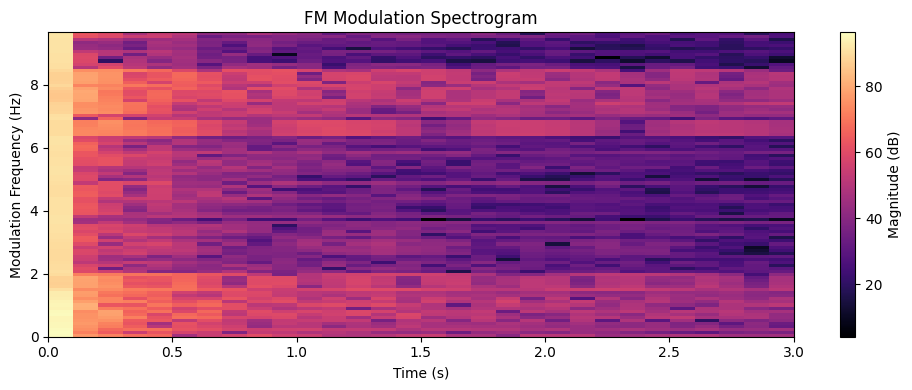

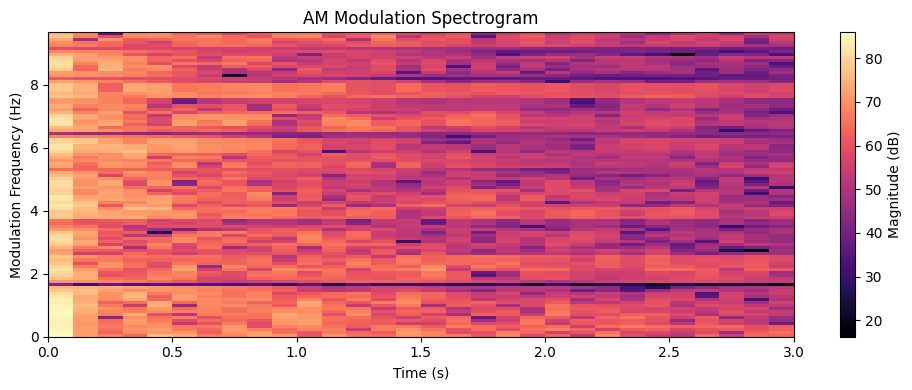

In [45]:
plot_mod_spectrogram(
    fm_spec,
    fm_frq[0],
    title="FM Modulation Spectrogram",
    hop_sec=3 / fm_spec.shape[1]
)

plot_mod_spectrogram(
    am_spec,
    am_frq[0],
    title="AM Modulation Spectrogram",
    hop_sec=3 / am_spec.shape[1]
)


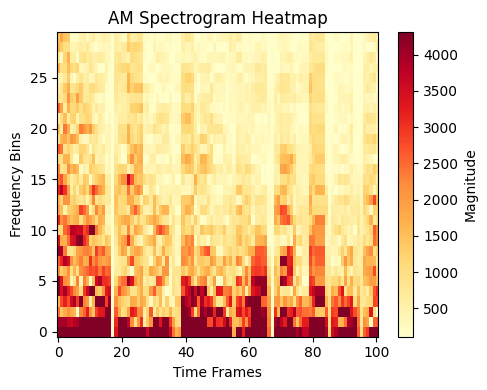

In [35]:
plt.figure(figsize=(figwidth, figheight))

# Compute display range from data percentiles to drop outliers
vmin, vmax = np.percentile(am_spec, [5, 95])  # adjust as needed

plt.imshow(
    am_spec.T,
    aspect='auto',
    cmap=spectrogramheatmap,
    origin='lower',
    vmin=vmin,
    vmax=vmax,
)
plt.colorbar(label='Magnitude')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.title('AM Spectrogram Heatmap')
plt.tight_layout()
plt.show()

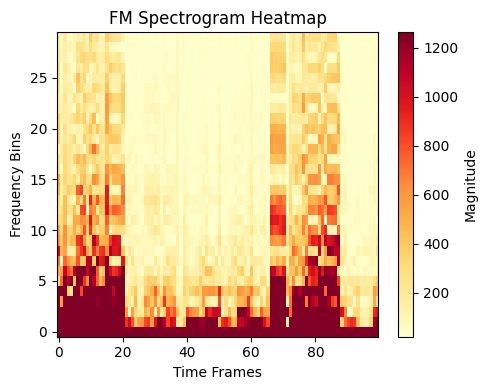

In [36]:
plt.figure(figsize=(figwidth, figheight))

# Compute display range from data percentiles to drop outliers
vmin, vmax = np.percentile(fm_spec, [10, 90])  # adjust as needed

plt.imshow(
    fm_spec.T,
    aspect='auto',
    cmap=spectrogramheatmap,
    origin='lower',
    vmin=vmin,
    vmax=vmax,
)
plt.colorbar(label='Magnitude')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.title('FM Spectrogram Heatmap')
plt.tight_layout()
plt.show()

In [19]:
fm_spec.shape

(100, 30)

In [20]:
am_spec.shape

(101, 30)

Hand crafted Parameterization

In [22]:
feats_with_name = extract_features_spectrogram(wavfile, specwindowsecs=3, specstrides=100, dct_num=2, num_R_form=5)

In [3]:
feats_with_name

dct_am_1    3.500185e+04
dct_am_2    1.132315e+03
dct_am_3    5.227137e+01
dct_am_4   -8.718440e+01
dct_fm_1    2.871103e+04
dct_fm_2    2.888446e+03
dct_fm_3    2.216042e+03
dct_fm_4   -1.786643e+02
var_am_1    1.056270e+06
var_am_2    9.313212e+05
var_am_3    5.566165e+05
var_am_4    7.780292e+05
var_am_5    8.730932e+05
var_am_6    6.808156e+05
var_fm_1    1.686582e+05
var_fm_2    1.991723e+05
var_fm_3    3.500130e+05
var_fm_4    2.318207e+05
var_fm_5    1.152982e+05
var_fm_6    4.417047e+04
dtype: float32